In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import json

In [6]:
# Set directories for training and validation datasets
train_dir = 'C:/Users/benab/Downloads/DEEP_FAKE_PROJET_IA/kaggle/input/dataset/old/train'
val_dir = 'C:/Users/benab/Downloads/DEEP_FAKE_PROJET_IA/kaggle/input/dataset/old/val'

train_real_dir = os.path.join(train_dir, 'real')
train_fake_dir = os.path.join(train_dir, 'fake')
val_real_dir = os.path.join(val_dir, 'real')
val_fake_dir = os.path.join(val_dir, 'fake')

Found 64600 images belonging to 2 classes.
Found 9946 images belonging to 2 classes.


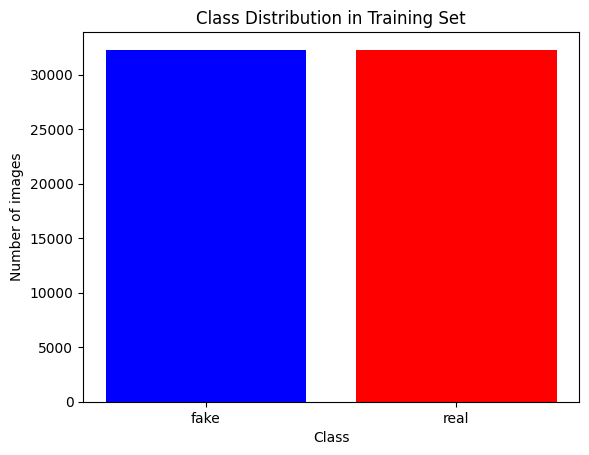

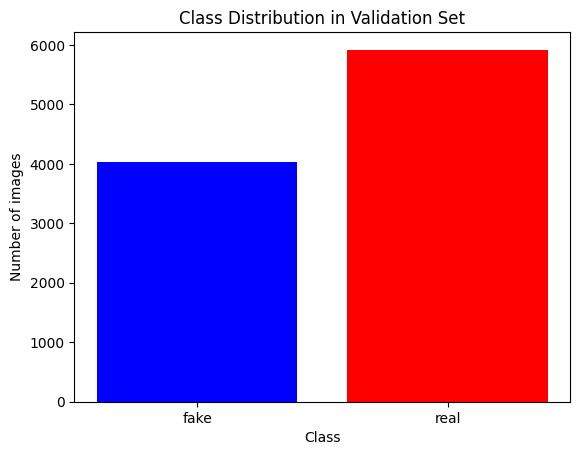

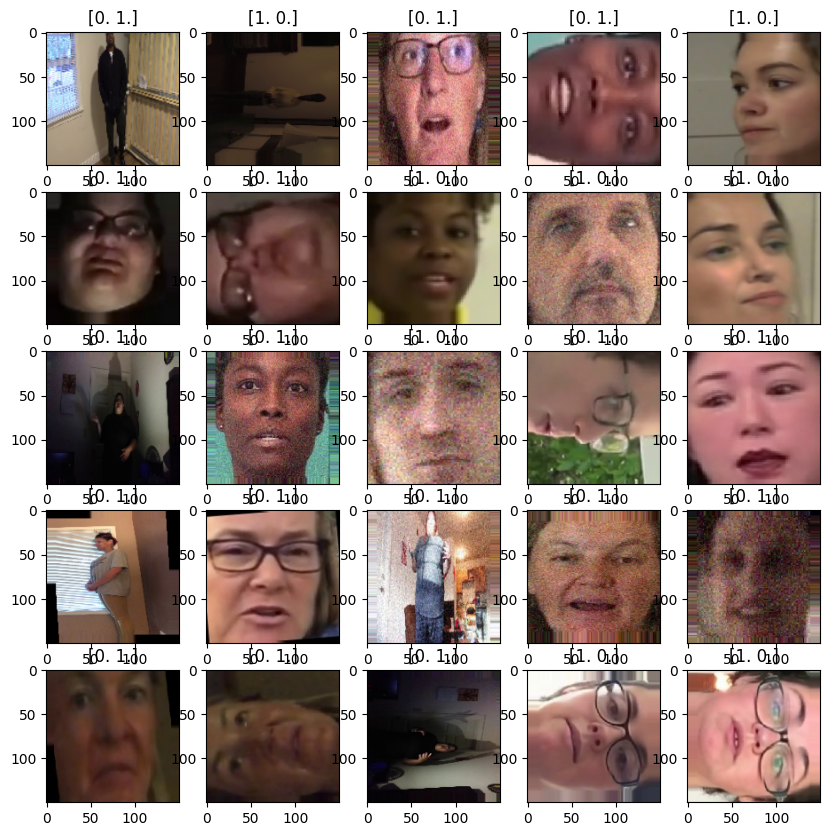

In [7]:
num_classes = 2
batch_size = 32
epochs = 40

# Data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load training and validation datasets
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

# Plot the number of images in each class for training and validation datasets
def plot_class_distribution(generator, title):
    labels, counts = np.unique(generator.classes, return_counts=True)
    class_names = [k for k, v in generator.class_indices.items()]
    plt.bar(class_names, counts, color=['blue', 'red'])
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of images')
    plt.show()

plot_class_distribution(train_generator, 'Class Distribution in Training Set')
plot_class_distribution(val_generator, 'Class Distribution in Validation Set')

# Visualize training data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_generator[0][0][i])
    plt.title(train_generator[0][1][i])
plt.show()

In [8]:
# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and save history to a JSON file
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

# Save the model to a file
model.save('image_deep_fake_model_3.h5')

# Save training history to a JSON file
history_dict = history.history
with open('training_history.json', 'w') as f:
    json.dump(history_dict, f)


c:\Users\benab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40


c:\Users\benab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2018/2018 ━━━━━━━━━━━━━━━━━━━━ 659s 325ms/step - accuracy: 0.7045 - loss: 0.5753 - val_accuracy: 0.9312 - val_loss: 0.1945
Epoch 2/40
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 0s 84us/step - accuracy: 0.8750 - loss: 0.3086 - val_accuracy: 0.8846 - val_loss: 0.2380
Epoch 3/40


c:\Users\benab\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2018/2018 ━━━━━━━━━━━━━━━━━━━━ 575s 284ms/step - accuracy: 0.8609 - loss: 0.3198 - val_accuracy: 0.9249 - val_loss: 0.1899
Epoch 4/40
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 0s 67us/step - accuracy: 0.8750 - loss: 0.2292 - val_accuracy: 0.9231 - val_loss: 0.2275
Epoch 5/40
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 566s 280ms/step - accuracy: 0.8910 - loss: 0.2601 - val_accuracy: 0.9441 - val_loss: 0.1483
Epoch 6/40
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 0s 106us/step - accuracy: 0.8750 - loss: 0.3038 - val_accuracy: 0.8846 - val_loss: 0.1563
Epoch 7/40
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 709s 351ms/step - accuracy: 0.9001 - loss: 0.2391 - val_accuracy: 0.9450 - val_loss: 0.1602
Epoch 8/40
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 0s 81us/step - accuracy: 0.8750 - loss: 0.2547 - val_accuracy: 1.0000 - val_loss: 0.0581
Epoch 9/40
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 644s 319ms/step - accuracy: 0.9104 - loss: 0.2152 - val_accuracy: 0.9587 - val_loss: 0.1165
Epoch 10/40
2018/2018 ━━━━━━━━━━━━━━━━━━━━ 0s 81us/step - accuracy: 0.9062 - loss

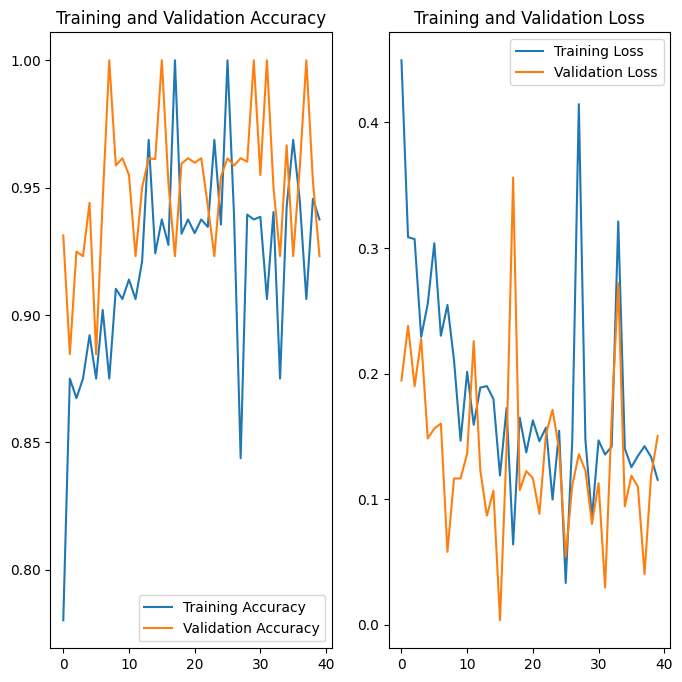

In [9]:
# Load training history from JSON file
with open('training_history.json', 'r') as f:
    history_dict = json.load(f)

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


311/311 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step


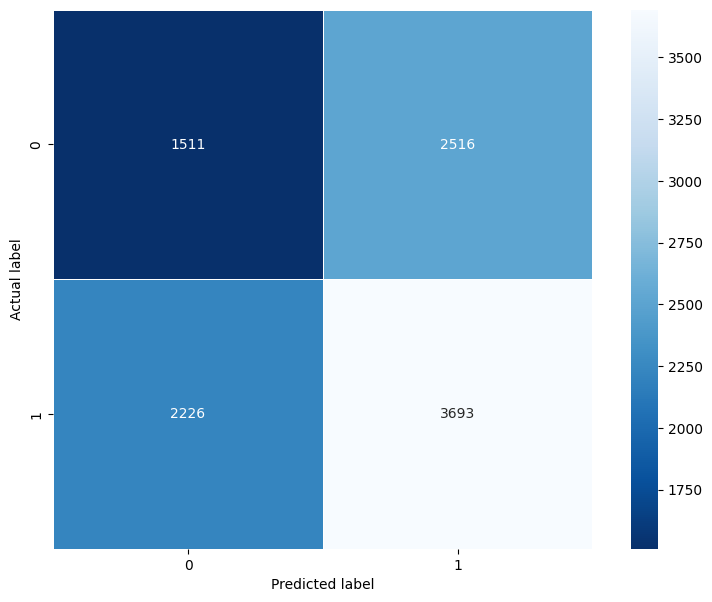

311/311 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step - accuracy: 0.9530 - loss: 0.1254
Validation Loss: 0.11550560593605042
Validation Accuracy: 0.9551578760147095
              precision    recall  f1-score   support

           0       0.40      0.38      0.39      4027
           1       0.59      0.62      0.61      5919

    accuracy                           0.52      9946
   macro avg       0.50      0.50      0.50      9946
weighted avg       0.52      0.52      0.52      9946



In [10]:
# Evaluate the model and generate confusion matrix and classification report
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

confusion_mtx = confusion_matrix(val_generator.classes, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mtx, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

val_loss, val_acc = model.evaluate(val_generator, verbose=1)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_acc)

# Print the classification report
report = classification_report(val_generator.classes, y_pred, output_dict=True)
print(classification_report(val_generator.classes, y_pred))


Model performance: not good


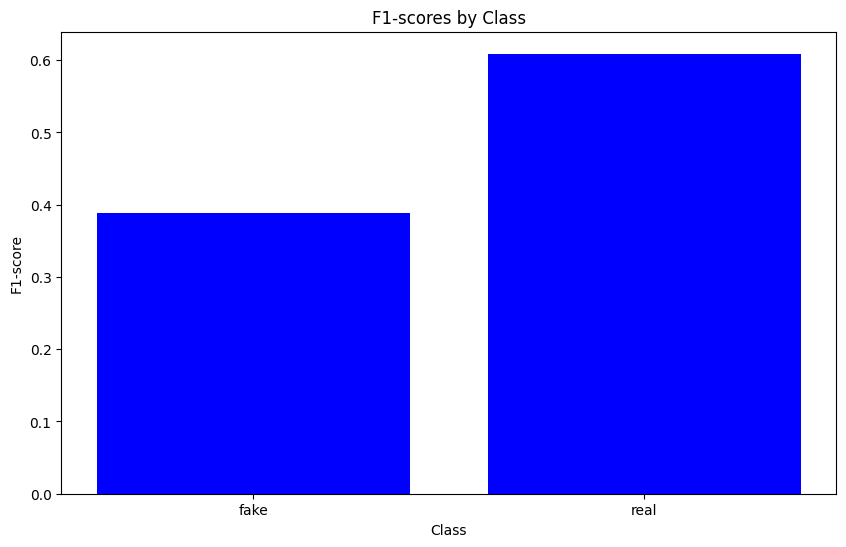

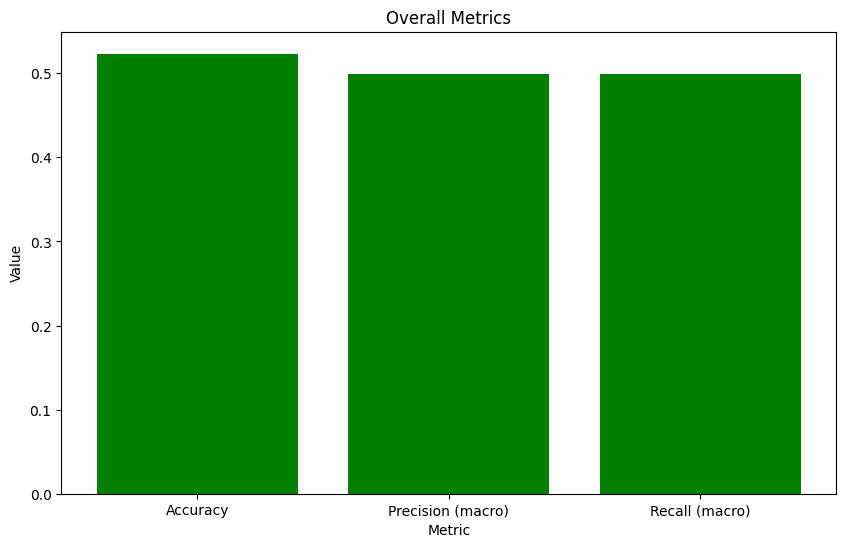

In [11]:
# Extract F1-scores and plot performance metrics
class_names = val_generator.class_indices.keys()
f1_scores = [report[str(i)]['f1-score'] for i, _ in enumerate(class_names)]

# Extract the accuracy, precision, and recall from the classification report
accuracy = report['accuracy']
precision_macro = report['macro avg']['precision']
recall_macro = report['macro avg']['recall']

# Set a minimum acceptable F1-score
min_f1_score = 0.7

# Determine whether the model is good or not based on its F1-score
if np.mean(f1_scores) > min_f1_score:
    model_performance = 'good'
else:
    model_performance = 'not good'

print(f'Model performance: {model_performance}')

# Plot the metrics as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_names, f1_scores, color='blue')
plt.xlabel('Class')
plt.ylabel('F1-score')
plt.title('F1-scores by Class')

plt.figure(figsize=(10, 6))
metrics_names = ['Accuracy', 'Precision (macro)', 'Recall (macro)']
metrics_values = [accuracy, precision_macro, recall_macro]
plt.bar(metrics_names, metrics_values, color='green')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Overall Metrics')

plt.show()


FileUpload(value=(), description='Upload', multiple=True)

Button(description='Predict', style=ButtonStyle())

Button(description='Clear Output', style=ButtonStyle())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


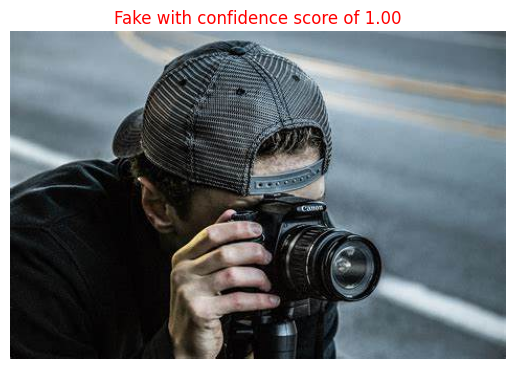

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


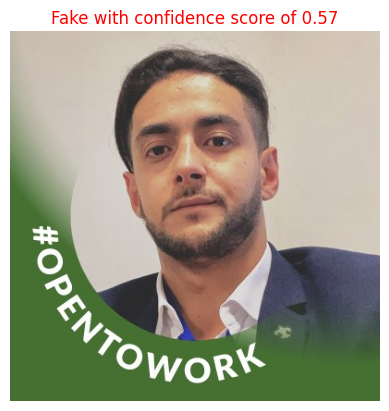

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


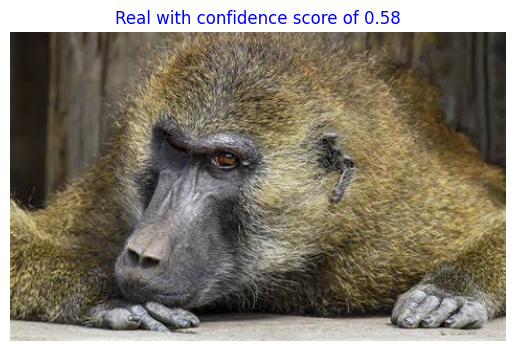

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


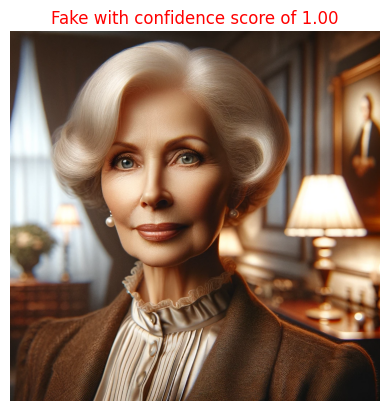

In [13]:
import keras
from keras.preprocessing import image
import numpy as np
import io
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the trained model
model = keras.models.load_model('image_deep_fake_model_3.h5')

# Define a function to handle the image selection
def select_images(files):
    # Process each uploaded file and make a prediction
    for file in files:
        # Convert the uploaded file to a BytesIO object
        img = image.load_img(io.BytesIO(file['content']), target_size=(150, 150))

        # Convert the image to an array and normalize the pixel values
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x /= 255.0

        # Make a prediction using the model
        y_pred = model.predict(x)

        # Extract the confidence score for the predicted class
        confidence_score = y_pred[0][1]  # Assuming the model outputs probability for class '1' (fake)

        # Determine the label and color based on the confidence score
        if confidence_score >= 0.50:
            label = f'Fake with confidence score of {confidence_score:.2f}'
            color = 'red'
        else:
            label = f'Real with confidence score of {1 - confidence_score:.2f}'  # Confidence for real is 1 - score for fake
            color = 'blue'

        # Display the image with the label
        plt.figure()
        plt.imshow(image.load_img(io.BytesIO(file['content'])))
        plt.title(label, color=color)
        plt.axis('off')
        plt.show()

# Define a function to trigger the predictions
def predict_images(button):
    # Get the uploaded files from the file picker widget
    files = file_picker.value

    # Call the select_images function to process the uploaded files
    select_images(files)

# Define a function to clear the output
def clear_output_func(button):
    clear_output()

# Create a widget to select multiple files
file_picker = widgets.FileUpload(multiple=True)

# Create a button widget to trigger the predictions
predict_button = widgets.Button(description="Predict")

# Create a button widget to clear the output
clear_button = widgets.Button(description="Clear Output")

# Display the widgets
display(file_picker)
display(predict_button)
display(clear_button)

# Attach the predict_images function to the predict button widget
predict_button.on_click(predict_images)

# Attach the clear_output_func function to the clear button widget
clear_button.on_click(clear_output_func)
